**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [210]:
# import
import numpy as np
from scipy import optimize
from scipy.optimize import minimize_scalar
import sympy as sm
from sympy import simplify
from sympy.solvers import solve
from sympy import *
sm.init_printing()
import matplotlib.pyplot as plt
from IPython.display import display, Math, Markdown

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

#
import q1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

In [178]:
# defining all variables in sympy
C = sm.symbols('C')
G = sm.symbols('G')
alpha = sm.symbols('alpha')
nu = sm.symbols('nu')
L = sm.symbols('L')
kappa = sm.symbols('kappa')
tau = sm.symbols('tau')
w = sm.symbols('w')
wtilde = sm.symbols('wtilde')

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [179]:
# define objective function
objective = sm.ln(C**alpha*G**(1-alpha))-nu*(L**2/2)
objective

   2                   
  L ⋅ν      ⎛ α  1 - α⎞
- ──── + log⎝C ⋅G     ⎠
   2                   

In [180]:
# substitute constraint into objective function
objective_subs = objective.subs(C, kappa+(1-tau)*w*L)
objective_subs

   2                                   
  L ⋅ν      ⎛ 1 - α                  α⎞
- ──── + log⎝G     ⋅(L⋅w⋅(1 - τ) + κ) ⎠
   2                                   

In [181]:
# compute foc
foc = sm.diff(objective_subs, L)
foc_subs = foc.subs((1-tau)*w, wtilde)
foc_subs

 1 - α  α - 1          
G     ⋅G     ⋅α⋅w̃      
───────────────── - L⋅ν
     L⋅w̃ + κ          

In [182]:
# solve foc
sol = sm.solve(sm.Eq(foc_subs,0),L)
sol

⎡          ___________________            ___________________⎤
⎢         ╱   ⎛     2    2  ⎞            ╱   ⎛     2    2  ⎞ ⎥
⎢-κ⋅ν - ╲╱  ν⋅⎝4⋅α⋅w̃  + κ ⋅ν⎠  -κ⋅ν + ╲╱  ν⋅⎝4⋅α⋅w̃  + κ ⋅ν⎠⎥
⎢─────────────────────────────, ─────────────────────────────⎥
⎣            2⋅ν⋅w̃                         2⋅ν⋅w̃           ⎦

When dividing by $\nu$ in sol[1], we will get the expression $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$.
We have tried to use the sympy simplify, but cannot obtain the exact expression as provided in the question. Instead we vell evaluate the two expressions at the provided baseline parameters and show that they give the same answer.

In [183]:
# define baseline parameters
alpha = 0.5
kappa = 1.0
nu = 1/(2*16**2)
w = 1.0
tau = 0.3

In [184]:
# define sympy solution
def L_star_sol(kappa, alpha, nu, tau, w):
    return (-kappa*nu+sqrt(nu*(kappa**2*nu+4*(alpha)*((1-tau)*w)**2)))/(2*nu*(1-tau)*w)

# define optimal labor supply function provided in assignment
def L_star(kappa, alpha, nu, tau, w):
    return (-kappa+sqrt(kappa**2+4*(alpha/nu)*((1-tau)*w)**2))/(2*(1-tau)*w)

print(f'L_star_sol = {L_star_sol(kappa, alpha, nu, tau, w):.4f} and L_star = {L_star(kappa, alpha, nu, tau, w):.4f}')


L_star_sol = 15.3017 and L_star = 15.3017


We see that the two results are identical why we find it reasonable to verify that the optimal labor supply choice is as stated in the description.

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In [185]:
# define vector of different values of w
w_vec = np.linspace(0.1,10,100)
# create vector of function values to plot
L_plot = np.zeros(len(w_vec))
# loop over different values of w
for i, wage in enumerate(w_vec):
    L_plot[i] = L_star(kappa, alpha, nu, tau, wage)

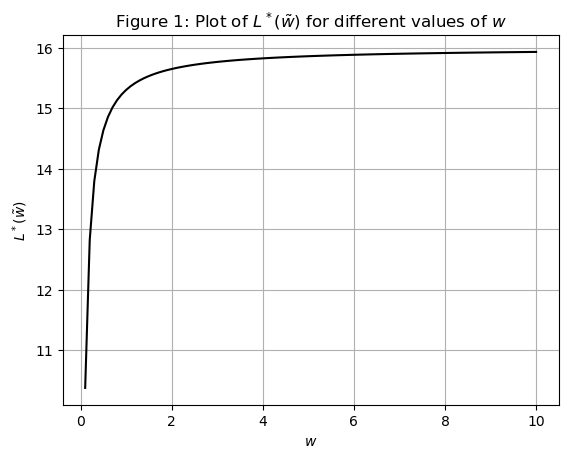

In [186]:
# create figure
fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(w_vec, L_plot, color='black')
# alterations to figure
ax.grid()
ax.set_xlabel("$w$")
ax.set_ylabel(r'$L^*(\tilde{w})$')
ax.set_title(r'Figure 1: Plot of $L^*(\tilde{w})$ for different values of $w$')
plt.show()

For values of w > 0 in the interval $w \in [0.1 , 10] $, we see that the optimal labor supply converges towards $\sim$ 16 hours.


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


Note: We were a bit confused about the notation, but we find it reasonable to assume that the government tax revenue is equal to the tax rate * wage * hours worked (implying that $L^*((1-\tau)w)$ means that L is a function of $(1-\tau)w = \tilde{w}$) and not tax rate * wage * L * (1-tau)*w.

In [204]:
# define vector of different values of tau
tau_vec = np.linspace(0.1,0.9,54)

# create vector of function values to plot
L_impl = np.zeros(len(tau_vec))
# loop over different values of tau
for i, t in enumerate(tau_vec):
    L_impl[i] = L_star(kappa, alpha, nu, t, w)

# define G as a function of tau, w and L_star
G_func = lambda tau, w, L: tau*w*L
# create vector of function values to plot
G_impl = np.zeros(len(tau_vec))
# loop over different values of tau
for i, t in enumerate(tau_vec):
    G_impl[i] = G_func(t, w, L_impl[i])

# define consumption function
C_func = lambda kappa, tau, w, L: kappa+(1-tau)*w*L
# define worker utility
V_func = lambda C, G, alpha, nu, L: np.log(C**alpha*G**(1-alpha))-nu*(L**2/2)
# create vector of function values to plot
V_impl = np.zeros(len(tau_vec))
# loop over different values of tau
for i, t in enumerate(tau_vec):
    V_impl[i] = V_func(C_func(kappa, t, w, L_impl[i]), G_impl[i], alpha, nu, L_impl[i])


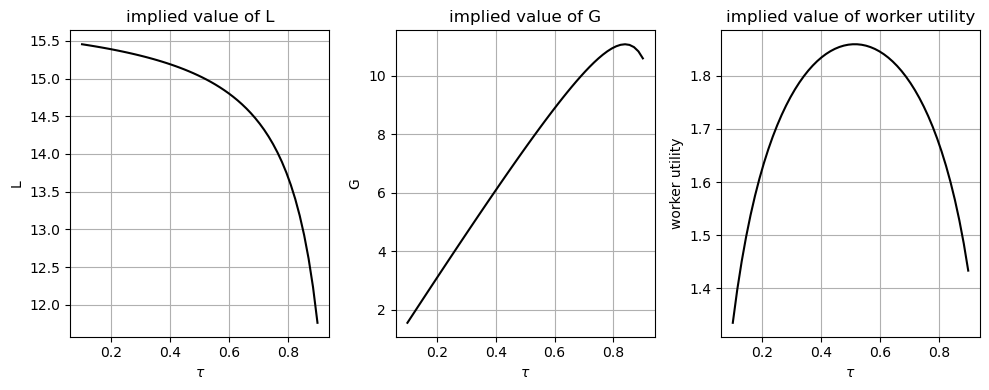

In [205]:
# create figure
fig = plt.figure(figsize=(10, 4))

# create plots
ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(tau_vec, L_impl, color='black')
ax1.set_ylabel('L')
ax1.set_xlabel(r'$\tau$')
ax1.grid()
ax1.set_title('implied value of L')

ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(tau_vec, G_impl, color='black')
ax2.set_ylabel('G')
ax2.set_xlabel(r'$\tau$')
ax2.grid()
ax2.set_title('implied value of G')

ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(tau_vec, V_impl, color='black')
ax3.set_ylabel('worker utility')
ax3.set_xlabel(r'$\tau$')
ax3.grid()
ax3.set_title('implied value of worker utility')

plt.tight_layout()

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [ ]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [ ]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [ ]:
# write your code here

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [ ]:
# write your code here 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [ ]:
# write your code here

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [ ]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [ ]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [ ]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [ ]:
# write your code here

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [ ]:
# write your code here